In [1]:
from math import sqrt
from numpy import concatenate
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
df=pd.read_csv("212_Temp.csv")

In [3]:
df.head()

,Date,Temperature,Humidity,Outside Temperature,Previous Date,Temperature on Previous day,2 days before Date,Temperature 2 days before
0,1/15/2020 1:42,71.7,60.59,68,1/14/2020 1:42,70.2,1/13/2020 1:42,71.0
1,1/15/2020 3:42,72.2,60.35,66,1/14/2020 3:42,71.0,1/13/2020 3:42,70.9
2,1/15/2020 5:42,72.6,60.09,68,1/14/2020 5:42,70.9,1/13/2020 5:42,71.0
3,1/15/2020 7:42,67.9,66.39,72,1/14/2020 7:42,67.5,1/13/2020 7:42,69.4
4,1/15/2020 9:42,66.7,67.92,75,1/14/2020 9:42,66.2,1/13/2020 9:42,66.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 8 columns):
Date                           384 non-null object
Temperature                    384 non-null float64
Humidity                       384 non-null float64
Outside Temperature            384 non-null int64
Previous Date                  384 non-null object
Temperature on Previous day    384 non-null float64
2 days before Date             384 non-null object
Temperature 2 days before      384 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 24.1+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [6]:
df.tail()

,Temperature,Humidity,Outside Temperature,Previous Date,Temperature on Previous day,2 days before Date,Temperature 2 days before
Date,,,,,,,
2020-02-15 15:42:00,63.6,50.31,62,2/14/2020 15:42,67.4,2/13/2020 15:42,66.4
2020-02-15 17:42:00,66.4,48.63,62,2/14/2020 17:42,65.7,2/13/2020 17:42,65.7
2020-02-15 19:42:00,67.2,48.87,63,2/14/2020 19:42,65.7,2/13/2020 19:42,65.0
2020-02-15 21:42:00,67.3,49.73,61,2/14/2020 21:42,67.2,2/13/2020 21:42,66.8
2020-02-15 23:42:00,68.2,48.69,59,2/14/2020 23:42,67.6,2/13/2020 23:42,67.7


In [7]:
df.dropna(inplace=True)

In [8]:
ts=df.loc['1/15/2020':'2/15/2020',['Temperature','Humidity','Outside Temperature','Temperature on Previous day','Temperature 2 days before']]
#ts=pd.concat([df.loc['2/03/2020':'2/07/2020'],df.loc['2/10/2020':'2/14/2020']])[['Temperature','Humidity','Outside Temperature','Temperature on Previous day','Temperature 2 days before']]
ts=pd.DataFrame(ts)
ts.head()

,Temperature,Humidity,Outside Temperature,Temperature on Previous day,Temperature 2 days before
Date,,,,,
2020-01-15 01:42:00,71.7,60.59,68,70.2,71.0
2020-01-15 03:42:00,72.2,60.35,66,71.0,70.9
2020-01-15 05:42:00,72.6,60.09,68,70.9,71.0
2020-01-15 07:42:00,67.9,66.39,72,67.5,69.4
2020-01-15 09:42:00,66.7,67.92,75,66.2,66.5


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


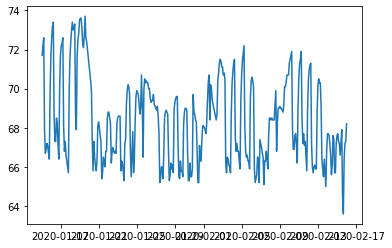

In [9]:
plt.plot(ts['Temperature'])

In [10]:
values=ts.values

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [12]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [13]:
reframed = series_to_supervised(scaled, 12, 1)

In [14]:
reframed.head()

,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var1(t-11),var2(t-11),var3(t-11),var4(t-11),var5(t-11),...,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
12,0.801980,0.694641,0.804348,0.597701,0.689655,0.851485,0.687837,0.760870,0.689655,0.678161,...,0.801980,0.698327,0.717391,0.678161,0.597701,0.891089,0.667706,0.717391,0.770115,0.597701
13,0.851485,0.687837,0.760870,0.689655,0.678161,0.891089,0.680465,0.804348,0.678161,0.689655,...,0.891089,0.667706,0.717391,0.770115,0.597701,0.950495,0.660335,0.760870,0.827586,0.689655
14,0.891089,0.680465,0.804348,0.678161,0.689655,0.425743,0.859087,0.891304,0.287356,0.505747,...,0.950495,0.660335,0.760870,0.827586,0.689655,0.970297,0.669124,0.760870,0.873563,0.678161
15,0.425743,0.859087,0.891304,0.287356,0.505747,0.306931,0.902467,0.956522,0.137931,0.172414,...,0.970297,0.669124,0.760870,0.873563,0.678161,0.495050,0.835554,0.847826,0.333333,0.287356
16,0.306931,0.902467,0.956522,0.137931,0.172414,0.326733,0.922314,0.956522,0.103448,0.080460,...,0.495050,0.835554,0.847826,0.333333,0.287356,0.366337,0.880919,0.913043,0.195402,0.137931


In [15]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[61,62,63,64]], axis=1, inplace=True)

In [16]:
reframed.tail()

,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var1(t-11),var2(t-11),var3(t-11),var4(t-11),var5(t-11),...,var2(t-2),var3(t-2),var4(t-2),var5(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t)
379,0.376238,0.360646,0.456522,0.160920,0.126437,0.207921,0.414233,0.347826,0.080460,0.103448,...,0.197335,0.717391,0.126437,0.103448,0.089109,0.307343,0.760870,0.298851,0.057471,0.000000
380,0.207921,0.414233,0.347826,0.080460,0.103448,0.207921,0.409697,0.239130,0.000000,0.103448,...,0.307343,0.760870,0.298851,0.057471,0.000000,0.403176,0.673913,0.275862,0.160920,0.277228
381,0.207921,0.409697,0.239130,0.000000,0.103448,0.356436,0.363765,0.173913,0.206897,0.436782,...,0.403176,0.673913,0.275862,0.160920,0.277228,0.355543,0.673913,0.080460,0.080460,0.356436
382,0.356436,0.363765,0.173913,0.206897,0.436782,0.396040,0.330876,0.195652,0.310345,0.597701,...,0.355543,0.673913,0.080460,0.080460,0.356436,0.362348,0.695652,0.080460,0.000000,0.366337
383,0.396040,0.330876,0.195652,0.310345,0.597701,0.405941,0.300255,0.260870,0.310345,0.632184,...,0.362348,0.695652,0.080460,0.000000,0.366337,0.386731,0.652174,0.252874,0.206897,0.455446


In [17]:
# split into train and test sets
values = reframed.values
n_train = 276
train = values[:n_train, :]
test = values[n_train:, :]

In [18]:
test.shape

(96, 61)

In [19]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape,test_X.shape, train_y.shape,test_y.shape)

(276, 60) (96, 60) (276,) (96,)


In [20]:
# specify the number of lag hours
n_hours = 12
n_features = 5

In [21]:
# split into input and outputs
#n_obs = n_hours * n_features
#train_X, train_y = train[:, :n_obs], train[:, -n_features]
#test_X, test_y = test[:, :n_obs], test[:, -n_features]
#print(train_X.shape,test_X.shape, train_y.shape,test_y.shape)

In [22]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))

In [23]:
print(train_X.shape,test_X.shape, train_y.shape,test_y.shape)

(276, 12, 5) (96, 12, 5) (276,) (96,)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 276 samples, validate on 96 samples
Epoch 1/30
 - 1s - loss: 0.3598 - val_loss: 0.1700
Epoch 2/30
 - 0s - loss: 0.2042 - val_loss: 0.1919
Epoch 3/30
 - 0s - loss: 0.1772 - val_loss: 0.1539
Epoch 4/30
 - 0s - loss: 0.1736 - val_loss: 0.1458
Epoch 5/30
 - 0s - loss: 0.1639 - val_loss: 0.1560
Epoch 6/30
 - 0s - loss: 0.1543 - val_loss: 0.1452
Epoch 7/30
 - 0s - loss: 0.1497 - val_loss: 0.1376
Epoch 8/30
 - 0s - loss: 0.1484 - val_loss: 0.1384
Epoch 9/30
 - 0s - loss: 0.1445 - val_loss: 0.1311
Epoch 10/30
 - 0s - loss: 0.1425 - val_loss: 0.1321
Epoch 11/30
 - 0s - loss: 0.1388 - val_loss: 0.1259
Epoch 12/30
 - 0s - loss: 0.1366 - val_loss: 0.1277
Epoch 13/30
 - 0s - loss: 0.1327 - val_loss: 0.1211
Epoch 14/30
 - 0s - loss: 0.1305 - val_loss: 0.1229
Epoch 15/30
 - 0s - loss: 0.1266 - val_loss: 0.1169
Epoch 16/30
 - 0s - loss: 0.1242 - val_loss: 0.1175
Epoch 17/30


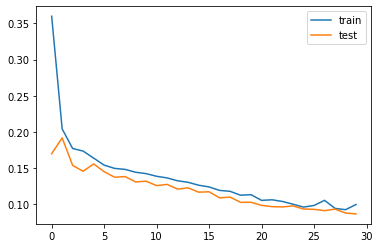

In [24]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=30, batch_size=32, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [25]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1]*test_X.shape[2]))

In [26]:
test_X.shape

(96, 60)

In [27]:
# invert scaling for forecast
testy_forecast = np.zeros(shape=(len(test_y), 5))

testy_forecast[:,0] = yhat[:,0]

inv_yhat = scaler.inverse_transform(testy_forecast)[:,0]

In [28]:
# invert scaling for actual test
testy_actual = np.zeros(shape=(len(test_y), 5))

testy_actual[:,0] = test_y

inv_y = scaler.inverse_transform(testy_actual)[:,0]

In [29]:
# invert scaling for actual train
trainy_actual = np.zeros(shape=(len(train_y), 5))

trainy_actual[:,0] = train_y

inv_y_train = scaler.inverse_transform(trainy_actual)[:,0]

In [30]:
inv_yhat

array([68.46698027, 68.24310834, 67.94097492, 67.65779839, 67.48273448,
       67.76762944, 68.33682427, 69.07334571, 68.76068078, 69.08383207,
       69.62680438, 69.84654533, 69.73898114, 69.41624584, 69.05472142,
       68.70011647, 68.52379948, 68.67943332, 69.24346624, 69.67369229,
       69.68887731, 70.17797301, 70.51090029, 70.48495439, 70.60000634,
       70.66253439, 70.75490272, 70.87003654, 69.57903934, 68.70240109,
       68.468041  , 68.68697526, 68.97558942, 69.13382633, 68.80458935,
       69.62115574, 70.40566888, 70.73871114, 70.63567947, 70.36146953,
       68.39040288, 67.18380133, 67.1728129 , 67.33242811, 67.85480275,
       67.99938524, 67.89607183, 69.30754626, 70.28368121, 70.56947315,
       70.30282984, 69.86754032, 67.64408197, 66.31040519, 65.95696587,
       66.29243769, 66.9522794 , 67.56347595, 68.10710806, 69.72057719,
       70.68671882, 70.63640549, 69.85559951, 68.88740323, 67.34360918,
       65.83126307, 65.27553754, 65.24513544, 65.90300875, 66.36

In [31]:
inv_y

array([68.4, 68.5, 68.4, 68.4, 68.4, 69.2, 69.9, 66.8, 68.3, 69. , 69. ,
       69.1, 69. , 69. , 68.9, 68.8, 69.1, 70.1, 70.1, 70.3, 70.7, 70.7,
       70.7, 71.3, 71.5, 71.7, 71.9, 68. , 66.9, 66.9, 67.6, 67.7, 67.1,
       66.2, 69.1, 70.6, 71.3, 71.5, 71.9, 68.5, 67.2, 67.7, 67.1, 67.3,
       66.5, 65.8, 69. , 70.4, 71. , 71.2, 71.3, 67.2, 66. , 65.7, 66. ,
       66.1, 65.9, 65.9, 68.8, 70.2, 70.5, 70.3, 70.3, 69.1, 66.4, 65.9,
       65.5, 66.4, 65.7, 65. , 66.8, 67.7, 67.7, 67.6, 67.2, 66.6, 65.6,
       66.1, 67.6, 67.4, 65.7, 65.7, 67.2, 67.6, 67.7, 67.3, 67.2, 66.6,
       67.2, 67.9, 64.5, 63.6, 66.4, 67.2, 67.3, 68.2])

In [32]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.147


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Temperature (F)')

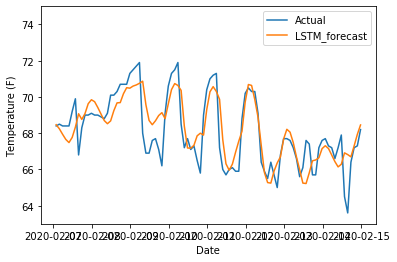

In [34]:
plt.plot(ts.index[276:372],inv_y,label='Actual')
plt.plot(ts.index[276:372],inv_yhat,label='LSTM_forecast')
plt.legend(loc="upper right")
plt.ylim(63,75)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')

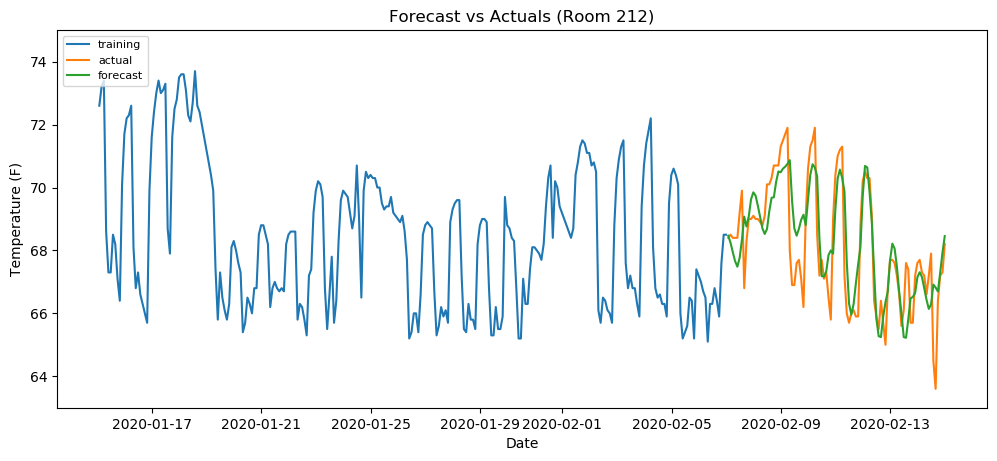

In [35]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(ts.index[:276],inv_y_train, label='training')
plt.plot(ts.index[276:372],inv_y, label='actual')
plt.plot(ts.index[276:372],inv_yhat, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals (Room 212)')
plt.legend(loc='upper left', fontsize=8)
plt.ylim(63,75)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.show()

# Linear regression

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
regressor = LinearRegression()

In [38]:
train_X_lr, train_y_lr = train[:, :-1], train[:, -1]
test_X_lr, test_y_lr = test[:, :-1], test[:, -1]

In [39]:
regressor.fit(train_X_lr,train_y_lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_pred= regressor.predict(test_X_lr)

In [41]:
#Invert scaling for forecast
testy_forecast_lr = np.zeros(shape=(len(test_y_lr), 5))

testy_forecast_lr[:,0] = y_pred

inv_yhat_lr = scaler.inverse_transform(testy_forecast_lr)[:,0]

In [42]:
inv_yhat_lr.shape

(96,)

In [43]:
#Invert scaling for actual
# invert scaling for actual

testy_actual_lr = np.zeros(shape=(len(test_y_lr), 5))

testy_actual_lr[:,0] = test_y_lr

inv_y_lr = scaler.inverse_transform(testy_actual_lr)[:,0]

In [44]:
inv_y_lr

array([68.4, 68.5, 68.4, 68.4, 68.4, 69.2, 69.9, 66.8, 68.3, 69. , 69. ,
       69.1, 69. , 69. , 68.9, 68.8, 69.1, 70.1, 70.1, 70.3, 70.7, 70.7,
       70.7, 71.3, 71.5, 71.7, 71.9, 68. , 66.9, 66.9, 67.6, 67.7, 67.1,
       66.2, 69.1, 70.6, 71.3, 71.5, 71.9, 68.5, 67.2, 67.7, 67.1, 67.3,
       66.5, 65.8, 69. , 70.4, 71. , 71.2, 71.3, 67.2, 66. , 65.7, 66. ,
       66.1, 65.9, 65.9, 68.8, 70.2, 70.5, 70.3, 70.3, 69.1, 66.4, 65.9,
       65.5, 66.4, 65.7, 65. , 66.8, 67.7, 67.7, 67.6, 67.2, 66.6, 65.6,
       66.1, 67.6, 67.4, 65.7, 65.7, 67.2, 67.6, 67.7, 67.3, 67.2, 66.6,
       67.2, 67.9, 64.5, 63.6, 66.4, 67.2, 67.3, 68.2])

Text(0, 0.5, 'Temperature (F)')

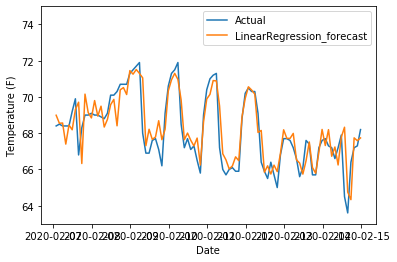

In [45]:
plt.plot(ts.index[276:372],inv_y_lr,label='Actual')
plt.plot(ts.index[276:372],inv_yhat_lr,label='LinearRegression_forecast')
plt.legend(loc="upper right")
plt.ylim(63,75)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')

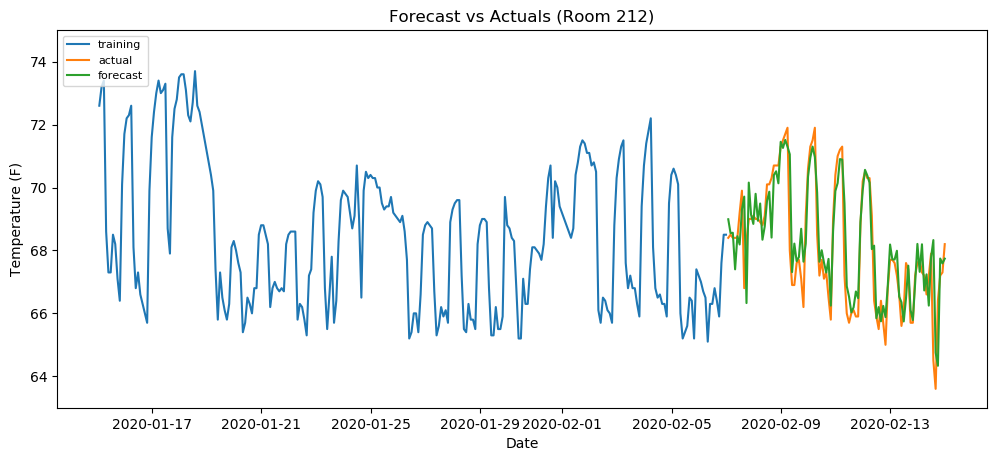

In [46]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(ts.index[:276],inv_y_train, label='training')
plt.plot(ts.index[276:372],inv_y_lr, label='actual')
plt.plot(ts.index[276:372],inv_yhat_lr, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals (Room 212)')
plt.legend(loc='upper left', fontsize=8)
plt.ylim(63,75)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.show()

In [47]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_lr, inv_yhat_lr))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.950
